# Part 1 - Psychophysics

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns


#Stevens Law and Fit Steven's to Fechner's law



In [ ]:
luminance = np.arange(1, 11, 1)
    

In [ ]:
perc_brightness_stevens = 10 * np.power(luminance, 0.33)
perc_brightness_stevens

array([10.        , 12.57013375, 14.36977652, 15.80082624, 17.00826843,
       18.06300128, 19.00563363, 19.86184991, 20.64904773, 21.3796209 ])

In [ ]:
sns.set()

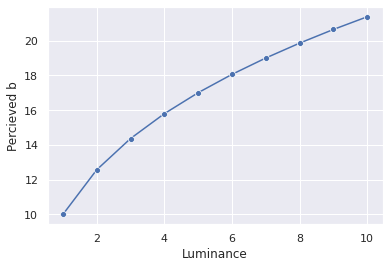

In [ ]:
sns.lineplot(luminance, perc_brightness_stevens, markers = True, marker = "o")
plt.xlabel('Luminance');
plt.ylabel('Percieved b');

In [ ]:
X = [np.log(luminance), np.ones(10)]
X

[array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
        1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

In [ ]:
Y = np.array(perc_brightness_stevens)
Y

array([10.        , 12.57013375, 14.36977652, 15.80082624, 17.00826843,
       18.06300128, 19.00563363, 19.86184991, 20.64904773, 21.3796209 ])

In [ ]:
np.linalg.pinv(X).T

array([[-0.3123382 , -0.16900502, -0.08516049, -0.02567185,  0.02047113,
         0.05817269,  0.0900489 ,  0.11766133,  0.14201722,  0.1638043 ],
       [ 0.5717685 ,  0.35527216,  0.22862992,  0.13877582,  0.06907956,
         0.01213358, -0.03601357, -0.07772052, -0.11450866, -0.14741678]])

In [ ]:
a, b = np.dot(np.linalg.pinv(X).T, Y)
np.dot(np.linalg.pinv(X).T, Y)

array([5.00478258, 9.31138574])

In [ ]:
k = a 
k

5.004782583035386

In [ ]:
threshold = np.power(np.e, -b/a)
threshold

0.15559519451740791

In [ ]:
perc_brightness_fechner = k * np.log(luminance / threshold)

In [ ]:
perc_brightness_fechner

array([ 9.31138574, 12.78043668, 14.80970139, 16.24948761, 17.36627257,
       18.27875233, 19.05024296, 19.71853855, 20.30801704, 20.83532351])

In [ ]:
perc_brightness_stevens

array([10.        , 12.57013375, 14.36977652, 15.80082624, 17.00826843,
       18.06300128, 19.00563363, 19.86184991, 20.64904773, 21.3796209 ])

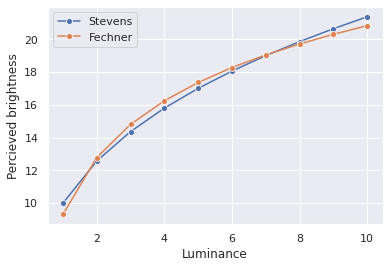

In [ ]:

sns.lineplot(luminance, perc_brightness_stevens, markers = True, marker = "o");
sns.lineplot(luminance, perc_brightness_fechner, markers = True, marker = "o");
plt.ylabel('Percieved brightness');
plt.xlabel('Luminance');
plt.legend(labels = ['Stevens', 'Fechner']);

In [ ]:
voltage = np.arange(1, 11, 1)

In [ ]:
perc_intensity_stevens = 0.00015 * np.power(voltage, 3.3)
perc_intensity_stevens

array([1.50000000e-04, 1.47737330e-03, 5.63107614e-03, 1.45508790e-02,
       3.03873112e-02, 5.54613434e-02, 9.22390436e-02, 1.43313868e-01,
       2.11393457e-01, 2.99289347e-01])

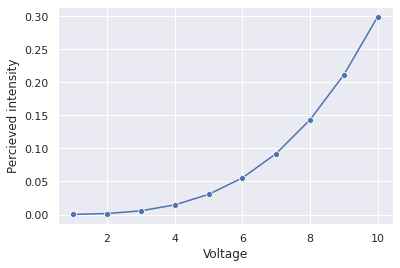

In [ ]:
sns.lineplot(voltage, perc_intensity_stevens, markers = True, marker = "o")
plt.xlabel('Voltage');
plt.ylabel('Percieved intensity');

In [ ]:
X = [np.log(voltage), np.ones(10)]
Y = np.array(perc_intensity_stevens)
np.linalg.pinv(X).T

array([[-0.3123382 , -0.16900502, -0.08516049, -0.02567185,  0.02047113,
         0.05817269,  0.0900489 ,  0.11766133,  0.14201722,  0.1638043 ],
       [ 0.5717685 ,  0.35527216,  0.22862992,  0.13877582,  0.06907956,
         0.01213358, -0.03601357, -0.07772052, -0.11450866, -0.14741678]])

In [ ]:
a, b = np.dot(np.linalg.pinv(X).T, Y)
np.dot(np.linalg.pinv(X).T, Y)

array([ 0.10691369, -0.07609748])

In [ ]:
k = a 

In [ ]:
threshold = np.power(np.e, -b/a)
perc_intensity_fechner = k * np.log(voltage / threshold)

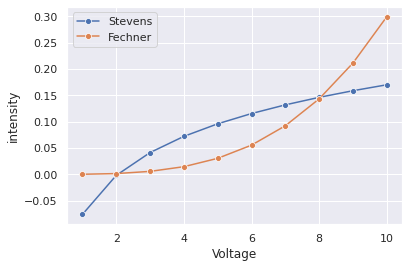

In [ ]:

sns.lineplot(voltage, perc_intensity_fechner, markers = True, marker = "o");
sns.lineplot(voltage, perc_intensity_stevens, markers = True, marker = "o");
plt.ylabel('intensity');
plt.xlabel('Voltage');
plt.legend(labels = ['Stevens', 'Fechner']);

###Outcome:
It is able to observe that the logarithmic approach of Fechner's law does not estimate properly the trend in differences between percieved intensities of observers. Hence, Fechner's law is only a good approximation in experiments where stimuli detection behaves logarithmically.

#Part 2 - Signal	Detection

In [ ]:
size = 50

trials_noise_set_1 = np.random.normal(0, 1, size)
trials_signal_set_1 = np.random.normal(1, 1, size)

trials_noise_set_2 = np.random.normal(0, 1, size)
trials_signal_set_2 = np.random.normal(1, 1, size)

trials_noise_set_3 = np.random.normal(0, 1, size)
trials_signal_set_3 = np.random.normal(1, 1, size)     


        

In [ ]:
def conversion(criterion, data_input):
    if (data_input >= criterion):
        return 1
    else:
        return 0

In [ ]:
lbda = 0.5

obs_response_signal_moderate = [conversion(lbda, signal_resp) for signal_resp in trials_signal_set_3]
obs_response_noise_moderate = [conversion(lbda, noise_resp) for noise_resp in trials_noise_set_3]

In [ ]:
lbda = -0.5

obs_response_signal_lax = [conversion(lbda, signal_resp) for signal_resp in trials_signal_set_2]
obs_response_noise_lax = [conversion(lbda, noise_resp) for noise_resp in trials_noise_set_2]

In [ ]:
lbda = 1.5

obs_response_signal_conservative = [conversion(lbda, signal_resp) for signal_resp in trials_signal_set_1]
obs_response_noise_conservative = [conversion(lbda, noise_resp) for noise_resp in trials_noise_set_1]

In [ ]:
p_fa_moderate = sum(obs_response_noise_moderate) / len(trials_noise_set_3)
p_cr_moderate = 1 - p_fa_moderate
p_hit_moderate = sum(obs_response_signal_moderate) / len(trials_signal_set_3)
p_miss_moderate = 1 - p_hit_moderate

In [ ]:
p_fa_lax = sum(obs_response_noise_lax) / len(trials_noise_set_2)
p_cr_lax = 1 - p_fa_lax
p_hit_lax = sum(obs_response_signal_lax) / len(trials_signal_set_2)
p_miss_lax = 1 - p_hit_lax

In [ ]:
p_fa_conservative = sum(obs_response_noise_conservative) / len(trials_noise_set_1)
p_cr_conservative = 1 - p_fa_conservative
p_hit_conservative = sum(obs_response_signal_conservative) / len(trials_signal_set_1)
p_miss_conservative = 1 - p_hit_conservative

In [ ]:
import scipy.stats as stats

est_d_prime_conservative = stats.norm.ppf(p_hit_conservative) - stats.norm.ppf(p_fa_conservative)
est_d_prime_lax = stats.norm.ppf(p_hit_lax) - stats.norm.ppf(p_fa_lax)
est_d_prime_moderate = stats.norm.ppf(p_hit_moderate) - stats.norm.ppf(p_fa_moderate)
print("d' for conservative " + str(est_d_prime_conservative))
print("d' for lax" + str(est_d_prime_lax))
print("d' for moderate " + str(est_d_prime_moderate))

print("It should all be 1")

d' for conservative 0.8222300530384167
d' for lax0.5559188281069152
d' for moderate 1.0018041986441109
It should all be 1


#Part 3 - Confidence rating


An observer responds according to a psychometric function shaped like a cumulative
Gaussian probability function in a signal detection task. The table lists the number of yesresponses out of 50 trials for five stimulus levels given in arbitrary units.

In [ ]:
num_yes_creates_stimul = np.array([[0.4, 0.9, 1.2, 1.7, 2.3],[1, 6, 13, 32, 49]])
stimul = num_yes_creates_stimul[0]
num_yes = num_yes_creates_stimul[1]

We have to estimate the parameters of the psychometric function. The function is represented as a CDF. 
Knowing this, we can write the psychometric function.
We inverse the CDF function in order to retrieve the probability density function of our experiment. We can extract that information from the book. 

$$ \phi[P(yes|x)]^{-1} = \frac{x - \mu}{\sigma}$$

The two unknown parameters are $\mu$ and $\sigma$,can be extracted from the linear form:
$$ a * x + b$$

\\
$$ \phi[P(yes|x)]^{-1} = \frac{1}{\sigma}x + (-\frac{\mu}{\sigma})$$

\\
This is important because now we can compute $a = \frac{1}{\sigma}$ and $b = -\frac{\mu}{\sigma}$.

\\
The data we have can be plottet like this and created the following graph:

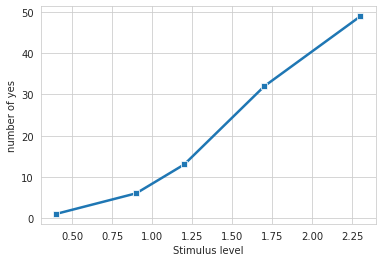

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

N = 50;
u = 1.5;
sigma = .5;

# number of yesresponses out of 50 trials for five stimulus levels


sns.set_style(style="whitegrid")
sns.lineplot(stimul, num_yes, palette="tab20", linewidth=2.5, markers = True, marker = "s")
plt.ylabel('number of yes')
plt.xlabel('Stimulus level')
plt.show()

Interesting is 𝑃(𝑌𝑒𝑠|𝑠𝑡𝑖𝑚𝑢𝑙𝑢𝑠) ! 

In [ ]:
p_yes = []
for i in num_yes:
  p_yes.append(i/N)
print(p_yes)

[0.02, 0.12, 0.26, 0.64, 0.98]


Now we have a list of the cummulative probabilities. 

In [ ]:
from scipy.stats import norm
K = norm.ppf(p_yes)
print(K)

[-2.05374891 -1.17498679 -0.64334541  0.35845879  2.05374891]


So in our case 0.02 occurs at -2.05 on the x axis and 0.98 on the 2.05 x axis. We can assume that our Gauss glocke is syemmetric.


We want to plot the cumulative normal distribution and plot it.



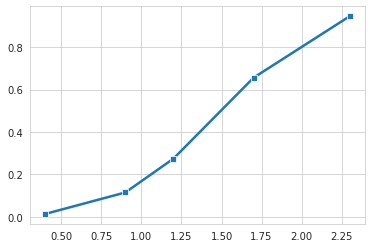

In [ ]:
from scipy.stats import norm

PC = norm.cdf((stimul-u)/sigma);
sns.lineplot(stimul, PC, palette="tab20", linewidth=2.5, markers = True, marker = "s")
plt.show()


We can find the slope between two points with a four loop, so we can ensure our graph is correct:

In [ ]:
g_l = []
for i in range(4):
    a = (PC[i+1] - PC[i]) / (stimul[i+1] - stimul[i])
    g_l.append(a)
print(g_l)


[0.20233244541641926, 0.5306114917612179, 0.762337247720501, 0.48296494448353]


Now, we will compute the parameters $\mu$ and $\sigma$, using $K$. \\
$K$ has the inverse CDF of the probability of **yes** responses by observers.

Additionally we need the matrix $X$ with two columns representing. \\
1. Column of values for the original stimulus
2. Column of ones for the computation of the intercept (_b_)

In [ ]:
X = np.concatenate((np.array(stimul).reshape(5,1), np.ones((5, 1))), axis = 1)
print(X)

[[0.4 1. ]
 [0.9 1. ]
 [1.2 1. ]
 [1.7 1. ]
 [2.3 1. ]]


Numpy has a useful tool linalg.pinv. \\
It computes the (Moore-Penrose) pseudo-inverse of a matrix.

Calculate the generalized inverse of a matrix using its singular-value decomposition (SVD) and including all large singular values.

In [ ]:
np.linalg.pinv(X)

array([[-0.42056075, -0.18691589, -0.04672897,  0.18691589,  0.46728972],
       [ 0.74672897,  0.44299065,  0.26074766, -0.04299065, -0.40747664]])

Additionally we will want to compute the matrix $\beta$, where we understand that $ \beta= \left[ {\begin{array}{c} slope(a) \\ intercept(b) \\ \end{array} } \right]$.

In [ ]:
a, b = np.dot(np.linalg.pinv(X), K)
a,b

(2.1401101424610594, -3.074117866040939)

That is great, because now we can easily find $\sigma$. 


In [ ]:
sigma = 1/a
sigma

0.467265670191176

$\mu$ -> We just need to refere to the earlier made linear equation and can reconstruct it:

In [ ]:
mu = -sigma *b
print(mu)


1.4364297449222871


#Outcome:
$\mu = 1.43$ and $\sigma = 0.46$ values of the psychometric function.

Now we can go on to the next task

### Psychometric function - sensitivity ($d'$) computation



Just 2 values: 

The sensitivity of this observer refers to distance between the gaussian PDF of the stimulus of high intensity (centered around the mean $\mu_s = 2$) and the gaussian PDF of the stimulus of low intensity (centered around the mean $\mu_s = 1$).

We use the formula for the sensitivity $d'$ of the equal variance observer: 


$d' = \phi^{-1}(P(Hit)) - \phi^{-1}(P(FA))$. 

This can be extacted from the script or book.


We have to use the values of __P(Hit)__ and __P(FA)__ from the psychometric function. 


 $$\phi^{-1}(P(High|x = 2)) = \phi^{-1}(P(Hit))$$ and $$\phi^{-1}(P(High|x = 1)) = \phi^{-1}(P(FA))$$
 Placing x = 1 and x = 2, into the linear function.


In [ ]:
x_high = 2
i_p_hit = (1/sigma) * x_high + (-mu/sigma)
print(i_p_hit)

1.2061024188811795


In [ ]:
x_low = 1
i_p_fa = (1/sigma) * x_low + (-mu/sigma)
print(i_p_fa)

-0.9340077235798798


In [ ]:
d_p = i_p_hit - i_p_fa
d_p

2.1401101424610594

Hence $d'$ is 2.14 